In [1]:
# Set Dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [2]:
# Read in the csv
df1 = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")

In [3]:
# Display the DataFrame
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df1.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [5]:
# Drop irrelevant columns from the data set
# wine_df = df1[["country", "description", "designation", "points", "price", "province", "region_1", "title", "variety", "winery"]]

# Taking out province and leaving region_1 only because it may be creating multicolinearity 
# wine1_df = df1[["country", "description", "points", "price", "region_1", "title", "variety", "winery"]]
# wine1_df.head()

# wine2_df = df1[["country", "points", "price", "region_1", "title", "variety", "winery"]]
# wine2_df.head()

wine3_df = df1[["country", "description", "points", "price", "region_1", "variety", "winery"]]
wine3_df.head()

,country,description,points,price,region_1,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Etna,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,NaN,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Willamette Valley,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Lake Michigan Shore,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Willamette Valley,Pinot Noir,Sweet Cheeks


In [6]:
wine3_df.columns

Index(['country', 'description', 'points', 'price', 'region_1', 'variety',
       'winery'],
      dtype='object')

In [7]:
# Print the length of our wine dataframe
len(wine3_df)

129971

In [8]:
# Parse the data to remove null items and NaN values
parsed_wine3_df = wine3_df.dropna()
parsed_wine3_df

,country,description,points,price,region_1,variety,winery
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Willamette Valley,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Lake Michigan Shore,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Willamette Valley,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Navarra,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Vittoria,Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...
129965,France,"While it's rich, this beautiful dry wine also ...",90,28.0,Alsace,Pinot Gris,Domaine Rieflé-Landmann
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Pinot Gris,Domaine Marcel Deiss


In [9]:
print("Length of wine dataframe after NaN are removed:", len(parsed_wine3_df))

Length of wine dataframe after NaN are removed: 101400


In [10]:
# Get info on our parsed dataframe
parsed_wine3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101400 entries, 2 to 129970
Data columns (total 7 columns):
country        101400 non-null object
description    101400 non-null object
points         101400 non-null int64
price          101400 non-null float64
region_1       101400 non-null object
variety        101400 non-null object
winery         101400 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 6.2+ MB


In [11]:
# Describe our dataframe
parsed_wine3_df.describe()

,points,price
count,101400.000000,101400.000000
mean,88.463343,36.936558
std,3.060467,41.895979
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,28.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


### WINE3_DF  VERSION 2 ###

In [12]:
parsed_wine3_df["finaltext"] = parsed_wine3_df["description"]+ " " +parsed_wine3_df["country"]+ " " +parsed_wine3_df["region_1"]+ " " +parsed_wine3_df["variety"]+ " " +parsed_wine3_df["winery"]
parsed_wine3_df.head() 

/Users/filipuccia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,description,points,price,region_1,variety,winery,finaltext
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Willamette Valley,Pinot Gris,Rainstorm,"Tart and snappy, the flavors of lime flesh and..."
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Lake Michigan Shore,Riesling,St. Julian,"Pineapple rind, lemon pith and orange blossom ..."
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Willamette Valley,Pinot Noir,Sweet Cheeks,"Much like the regular bottling from 2012, this..."
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Navarra,Tempranillo-Merlot,Tandem,Blackberry and raspberry aromas show a typical...
6,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Vittoria,Frappato,Terre di Giurfo,"Here's a bright, informal red that opens with ..."


In [13]:
# Vectorizing data
X = parsed_wine3_df["finaltext"]
y = parsed_wine3_df["price"]

X2 = parsed_wine3_df["points"]

vectorizer = CountVectorizer()
vectorizer.fit(X)
    
X = vectorizer.fit_transform(X)

In [14]:
X.shape

(101400, 35693)

In [15]:
y.shape

(101400,)

In [16]:
X
# vectorizer = TfidfVectorizer()
# X_example = parsed_wine3_df["description"].values
# fit_vect = vectorizer.fit_transform(X_example)
# fit_vect.shape

<101400x35693 sparse matrix of type '<class 'numpy.int64'>'
	with 4097940 stored elements in Compressed Sparse Row format>

In [17]:
# X = vectorizer.transform(X)
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (101400, 35693)
Amount of Non-Zero occurrences:  4097940
Density: 0.11322558895989583


In [19]:
pd.DataFrame.sparse.from_spmatrix(X)

,0,1,2,3,4,5,6,7,8,9,...,35683,35684,35685,35686,35687,35688,35689,35690,35691,35692
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X2.reset_index(drop = True, inplace = True)

In [21]:
Z =pd.DataFrame.sparse.from_spmatrix(X).join(X2)
Z.head()

,0,1,2,3,4,5,6,7,8,9,...,35684,35685,35686,35687,35688,35689,35690,35691,35692,points
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87


In [ ]:
# variable = np.array(Z[:1])

# Z[:1]

# len(variable[0])

# #10763

# variable[0][10762]

In [22]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(Z, y, random_state=33)


In [23]:
# Training the model
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(verbose=True, n_jobs=-1)
rfr.fit(X_train, y_train)


#save the model 

with open('wine_rfr_model.pickle', 'wb') as handle:
    pickle.dump(rfr, handle)

# with open('wine_rfr_model.pickle', 'rb') as handle:
#   pickle.load(rfr, handle)


/Users/filipuccia/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 23.1min remaining: 15.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 31.7min finished


In [24]:
# Testing the model
predictions = rfr.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.2s finished


In [26]:
training_score_vect = rfr.score(X_train, y_train)
testing_score_vect = rfr.score(X_test, y_test)

print(f"Training Score with Vectorizing: {training_score_vect}")
print(f"Testing Score with Vectorizing: {testing_score_vect}")

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.1s finished


Training Score with Vectorizing: 0.8866074307109625
Testing Score with Vectorizing: 0.429620879912675


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    1.3s remaining:    0.8s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    1.1s remaining:    0.7s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.1s finished


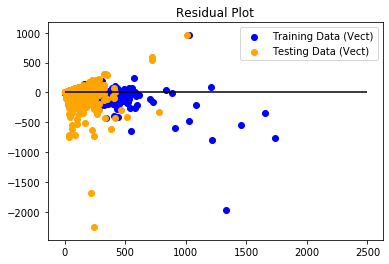

In [27]:
# Plot the Residuals for the Training and Testing data with *=* wine2_df *=*

plt.scatter(rfr.predict(X_train), rfr.predict(X_train) - y_train, c="blue", label="Training Data (Vect)")
plt.scatter(rfr.predict(X_test), rfr.predict(X_test) - y_test, c="orange", label="Testing Data (Vect)")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()